In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import PandasTools, Descriptors

### Hit 1

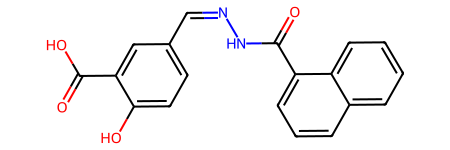

In [2]:
HIPS6459 = r"O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O"
mol = Chem.MolFromSmiles(HIPS6459)
# Default
display(mol)

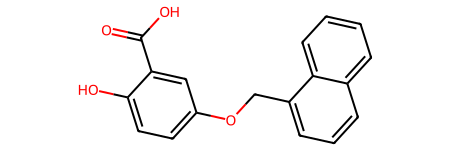

In [3]:
### Reference ligand
HIPS6790 = r"O=C(O)c1cc(/OCc2cccc3ccccc23)ccc1O"
mol = Chem.MolFromSmiles(HIPS6790)
# Default
display(mol)

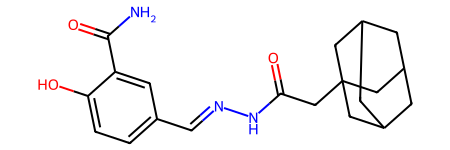

In [4]:
HIPS6897 = 'NC(=O)c1cc(/C=N/NC(=O)CC23CC4CC(CC(C4)C2)C3)ccc1O'

mol = Chem.MolFromSmiles(HIPS6897)
# Default
mol

### Hit 2

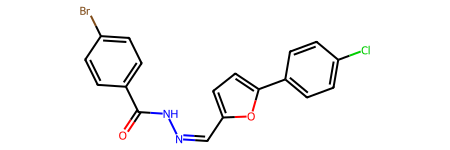

In [5]:
HIPS6706 = 'O=C(N/N=C\c1ccc(-c2ccc(Cl)cc2)o1)c1ccc(Br)cc1'
mol = Chem.MolFromSmiles(HIPS6706)
# Default
mol

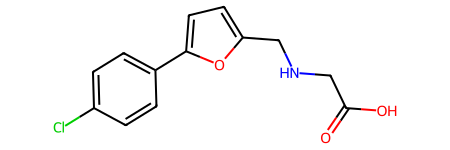

In [6]:
HIPS7216 = 'C1=CC(=CC=C1C2=CC=C(O2)CNCC(=O)O[H])Cl'

mol = Chem.MolFromSmiles(HIPS7216)
# Default
mol

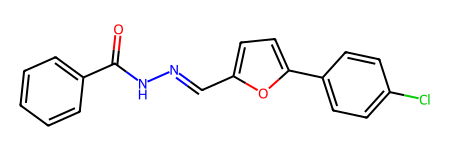

In [7]:
HIPS7857 = 'O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3=CC=CC=C3'

mol = Chem.MolFromSmiles(HIPS7857)
# Default
mol

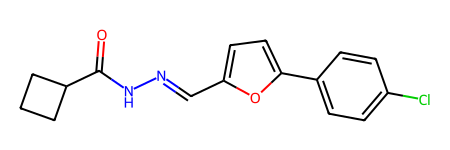

In [8]:
HIPS7912 = 'O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3CCC3'

mol = Chem.MolFromSmiles(HIPS7912)
# Default
mol

In [9]:
hit1 = [HIPS6459, HIPS6790, HIPS6897]
hit1name = ['HIPS6459', 'HIPS6790', 'HIPS6897']
hit1_inh_250 = [72.5,34,43.4]
hit1_ic_50 = [308 , 315 , 99.5 ] 
hit1_inh_200 = [11.6, 42.7 , 81.3]

In [10]:
hit2 = [HIPS6706 , HIPS7216, HIPS7857, HIPS7912]
hit2name = ['HIPS6706' , 'HIPS7216', 'HIPS7857', 'HIPS7912']
hit2_inh_250 = [85.8, 1200, 52.2 , "unknown"]
hit2_ic_50 = [152.8, "unknown",56 , "unknown" ]
hit2_inh_200 = [59.5 , 10000 , 68.5, "unknown"]

In [11]:
allhits = hit1 + hit2
allhitsname = hit1name + hit2name

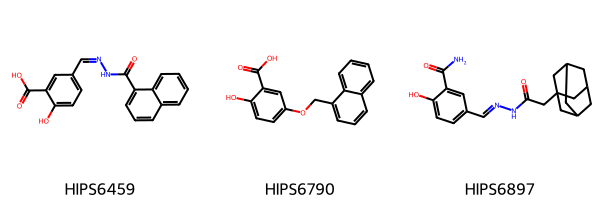

In [12]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in hit1]
img = Draw.MolsToGridImage(mol_list, molsPerRow=3, legends=hit1name)
img

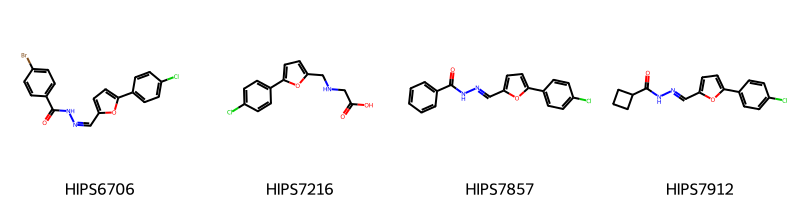

In [13]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in hit2]
img = Draw.MolsToGridImage(mol_list,molsPerRow=4, legends=hit2name)
img

In [14]:
df_hit1 = pd.DataFrame({'ID': hit1name ,'IC50' : hit1_ic_50, '% Inh@200 μM ': hit1_inh_200,"% Inh@250 μM" : hit1_inh_250, 'smiles':hit1, 'Molecule': [Chem.MolFromSmiles(smiles) for smiles in hit1]})

display(df_hit1)

PandasTools.WriteSDF(df_hit1, 'data/ligands/hit_one.sdf',idName="ID", molColName='Molecule', properties=df_hit1.columns)


,ID,IC50,% Inh@200 μM,% Inh@250 μM,smiles,Molecule
0,HIPS6459,308.0,11.6,72.5,O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O,<rdkit.Chem.rdchem.Mol object at 0x7f4c6657d900>
1,HIPS6790,315.0,42.7,34.0,O=C(O)c1cc(/OCc2cccc3ccccc23)ccc1O,<rdkit.Chem.rdchem.Mol object at 0x7f4c6657d510>
2,HIPS6897,99.5,81.3,43.4,NC(=O)c1cc(/C=N/NC(=O)CC23CC4CC(CC(C4)C2)C3)ccc1O,<rdkit.Chem.rdchem.Mol object at 0x7f4c6657d890>


In [15]:
df_hit2 = pd.DataFrame({'ID': hit2name ,'IC50' : hit2_ic_50, '% Inh@200 μM ': hit2_inh_200,"% Inh@250 μM" : hit2_inh_250, 'smiles':hit2, 'Molecule': [Chem.MolFromSmiles(smiles) for smiles in hit2]})

display(df_hit2)

PandasTools.WriteSDF(df_hit2, 'data/ligands/hit_two.sdf',idName="ID", molColName='Molecule', properties=df_hit2.columns)

,ID,IC50,% Inh@200 μM,% Inh@250 μM,smiles,Molecule
0,HIPS6706,152.8,59.5,85.8,O=C(N/N=C\c1ccc(-c2ccc(Cl)cc2)o1)c1ccc(Br)cc1,<rdkit.Chem.rdchem.Mol object at 0x7f4c66520b30>
1,HIPS7216,unknown,10000,1200,C1=CC(=CC=C1C2=CC=C(O2)CNCC(=O)O[H])Cl,<rdkit.Chem.rdchem.Mol object at 0x7f4c66520c10>
2,HIPS7857,56,68.5,52.2,O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3=CC=CC=C3,<rdkit.Chem.rdchem.Mol object at 0x7f4c66520820>
3,HIPS7912,unknown,unknown,unknown,O=C(NN=CC2=CC=C(C1=CC=C(C=C1)Cl)O2)C3CCC3,<rdkit.Chem.rdchem.Mol object at 0x7f4c66520ba0>


In [16]:
from data_preparation import run_gypsumdl
prepared_molecules_path = run_gypsumdl(f"data/ligands/hit_one.sdf", f"gypsum_dl_success_cleaned_hit1")
prepared_molecules_path = run_gypsumdl(f"data/ligands/hit_two.sdf", f"gypsum_dl_success_cleaned_hit2")
prepared_molecules_path = run_gypsumdl(f"data/ligands/stereoisomers.sdf", f"gypsum_dl_success_cleaned_stereoisomers")


If you use Gypsum-DL in your research, please cite:

Ropp, Patrick J., Jacob O. Spiegel, Jennifer L. Walker, Harrison Green,
Guillermo A. Morales, Katherine A. Milliken, John J. Ringe, and Jacob D. Durrant.
(2019) Gypsum-DL: An Open-source Program for Preparing Small-molecule Libraries for 
Structure-based Virtual Screening. Journal of Cheminformatics 11:1. 
doi:10.1186/s13321-019-0358-3.

    Gypsum-DL-generated variants, we have identified a number of substructures
    that, though technically possible, strike us as improbable or otherwise
    poorly suited for virtual screening. We strongly recommend removing these by
    running Gypsum-DL with the --use_durrant_lab_filters option.

Loading molecules from hit_one.sdf...
Desalting all molecules (i.e., keeping only largest fragment).
    Contents of MolContainers
        MolContainer #0 (HIPS6459)
            Mol #0: O=C(O)c1cc(/C=N\NC(=O)c2cccc3ccccc23)ccc1O
        MolContainer #1 (HIPS6790)
            Mol #0: O=C(O)c1cc(OCc2cccc3

### Docking used GNINA --score=refinement on Cluster

Utilizing gradient function to give minimum energy pose of the ligand.

In [ ]:
from docking import gnina_docking

snapshot_ID = "A"
sdf_name = "docked_gnina_pose_A_stereoisomers_64.sdf"
ref_file = f"data/{snapshot_ID}/ref_ligand.pdb"

gnina_docking(snapshot_ID, sdf_name, prepared_molecules_path, ref_file, "64")

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina  master:e9cb230+   Built Feb 11 2023.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Recommend running with single model (--cnn crossdock_default2018)
or without cnn scoring (--cnn_scoring=none).

Commandline: ./software/gnina -r data/A/protein_protoss_noligand.pdb -l data/ligands/gypsum_dl_success_cleaned_stereoisomers.sdf --autobox_ligand data/A/ref_ligand.pdb -o data/A/docked_gnina_pose_A_stereoisomers_64.sdf --seed 1637317264 --exhaustiveness 64 --num_modes 10 --cnn_scoring rescore --cnn crossdock_default2018 --no_gpu --log data/log.txt
Using random seed: 1637317264

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************


In [ ]:
def physicochem_prop(df):
    df["molecular_weight"] = df["ROMol"].apply(Descriptors.ExactMolWt)
    df["Hydrogen_Bond_Donors"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
    df["Hydrogen_Bond_Acceptors"] = df["ROMol"].apply(Descriptors.NumHDonors)
    df["logp"] = df["ROMol"].apply(Descriptors.MolLogP)
    df["Num_valence_electrons"] = df["ROMol"].apply(Descriptors.NumValenceElectrons)
    df.rename(columns = {'ROMol':'3D_predicted_Structure'}, inplace = True)
    display(df)
    PandasTools.WriteSDF(docked_hit1, f'dcc_data/docked_gnina_hit1_refinment_physicochem.sdf', idName='ID', molColName='3D_predicted_Structure', properties=docked_hit1.columns)

In [3]:
docked_hit1 = PandasTools.LoadSDF('dcc_data/docked_gnina_hit1_refienment.sdf')
physicochem_prop(docked_hit1)

In [24]:
docked_hit2 = PandasTools.LoadSDF('dcc_data/docked_gnina_hit2_refienment.sdf')
physicochem_prop(docked_hit2)
display(docked_hit2)

NameError: name 'physicochem_prop' is not defined

In [ ]:
docked_stereoisomers = PandasTools.LoadSDF('dcc_data/docked_gnina_hit2_refienment.sdf')
